# Analyzing Popular App Categories on Google Play Project
In this Project, Our Goal is to figure out what types of apps tend to be popular on the google Play Store. We work for a company that makes free apps and earn money through ads. By Understanding which App Categories are in high demand. We can help our developers create apps that attract more users and generate more revenue. We will Analyze data from Google Play store to identify patterns and preferences among users. This way, we can make smarter decisions about the kinds of apps we develops.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the Datasets into Pandas Dataframe objects
andriod_df = pd.read_csv("googleplaystore.csv")

In [3]:
# explore the data using pandas methods
andriod_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
andriod_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [5]:
andriod_df[andriod_df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
andriod_df[andriod_df["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [7]:
clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone','LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']
clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [8]:
andriod_df[andriod_df["Category"] == "1.9"] = clean_lst

In [9]:
andriod_category = andriod_df["Category"].value_counts()
andriod_category

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [10]:
app_count = andriod_df["App"].value_counts()
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [11]:
app_count[app_count > 1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [12]:
"Instagram" in app_count[app_count > 1].index

True

In [13]:
andriod_df[andriod_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [14]:
# Check for duplicate rows based on 'App' coloumn marking all duplicates as True
duplicate_apps_df = andriod_df[andriod_df.duplicated(subset=['App'], keep=False)]   
# keep=False means jitne bhi duplicate hai wo sb show kro

duplicate_apps_df[duplicate_apps_df['App'] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [15]:
# Number of Duplicate Apps
num_duplicate_apps = duplicate_apps_df['App'].nunique()
num_duplicate_apps

798

In [16]:
duplicate_apps_df.shape

(1979, 13)

In [17]:
andriod_df.shape[0]

10841

In [18]:
andriod_df['App'].nunique()

9660

# Part Two

let's start by building the Dictionary

In [19]:
# Group by 'App' and get the maxima number of reviews for each app
reviews_max = andriod_df.groupby('App')["Reviews"].max()

In [20]:
reviews_max['Instagram']

'66577446'

In [21]:
duplicate_apps_df[duplicate_apps_df['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


##
Now, let's use the reviews_max dictionary to remove the duplicates. for the duplicates cases, we will only keep the highest number of reviews. In the Code below:

- We Start by intializing two empty lists, andriod_clean and already_added.
- We apply loop through the andriod data set, and for every iteration: 

           1. We isolate the name of the app and the number of reviews.
           2.We add the current row(app) to the andriod_clean list, and the app name(name) to the already_added list if:
           
                   - The No of reviews of the current app matches the No of reviews of that app as described in the 
                     reviews_max dictionary, and the Name of the app is not in Already_added list. we need to add this                                       supplementary condition to account for those cases where the highest number of reviews of a 
                     duplicate app is the same for more than one entry.
             
                    For Example : the box app has three entries, and the No of reviews is the Same.
                    if we just check for reviews_max == n_reviews, we will still end up with duplicate entries 
                    for some apps.
                   

In [22]:
# Create an Empty list to store cleaned data
andriod_clean = []

#Create an Empty list to keep track of already added apps
already_added = []

#Iterate through each row in the Dataframe
for index, row in andriod_df.iterrows():
    name = row['App']
    n_reviews = row['Reviews']
    
    # Check if the current app has the maximum number of reviews and has not been added before
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        andriod_clean.append(row) # Add the App to the Cleaned list
        already_added.append(name) # Add the App name to the list of Already added apps

In [23]:
andriod_clean = pd.DataFrame(andriod_clean)

In [24]:
andriod_clean.shape

(9660, 13)

# Removing Non-English Apps

## Part One

If you explore the data sets enough, You will notice the names of some of the apps suggest they are not directed towards an English-Speaking audience. below we see a couple of examples from both data sets:

In [25]:
ord("A")    # Ascii Code range 0 to 127 for python, other than python range is 1 to 128

65

In [26]:
ord("a")          #   127 onwards are Non-english character

97

In [27]:
chr(125)

'}'

In [28]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else: 
            lst.append(True)
            
    check = set(lst)        
    
    if False in check:
        return False
    else:
        return True
        

In [29]:
for i in "Suhaib":
    print(i)

S
u
h
a
i
b


In [30]:
is_english("Instagram 😂")

False

In [31]:
is_english("Instagram")

True

# Part Two

In [32]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else: 
            lst.append(True)
            
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1
            
    if non_ascii > 3:
            return False
    else:
            return True

In [33]:
is_english("English Jokes 😂😂😂")

True

In [34]:
is_english("English Jokes 😂😂😂😂")

False

In [35]:
[andriod_clean["App"].apply(is_english)]

[0        True
 2        True
 3        True
 4        True
 5        True
          ... 
 10836    True
 10837    True
 10838    True
 10839    True
 10840    True
 Name: App, Length: 9660, dtype: bool]

In [36]:
andriod_english = andriod_clean[andriod_clean["App"].apply(is_english)]

In [37]:
andriod_english.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in_app ads. Our Data set contains both free and non_free apps and we will need to isolate only the free apps for our analysis. 
below, we isolate for both our data sets.

In [38]:
andriod_english['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [39]:
andriod_final = andriod_english[andriod_english["Price"] == "0"]

In [40]:
andriod_final

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Most Common Apps by Genre

In [41]:
# Analysis

In [42]:
andriod_final["Category"].value_counts(normalize = True)*100     #Normalize gives us the percentage

Category
FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
A

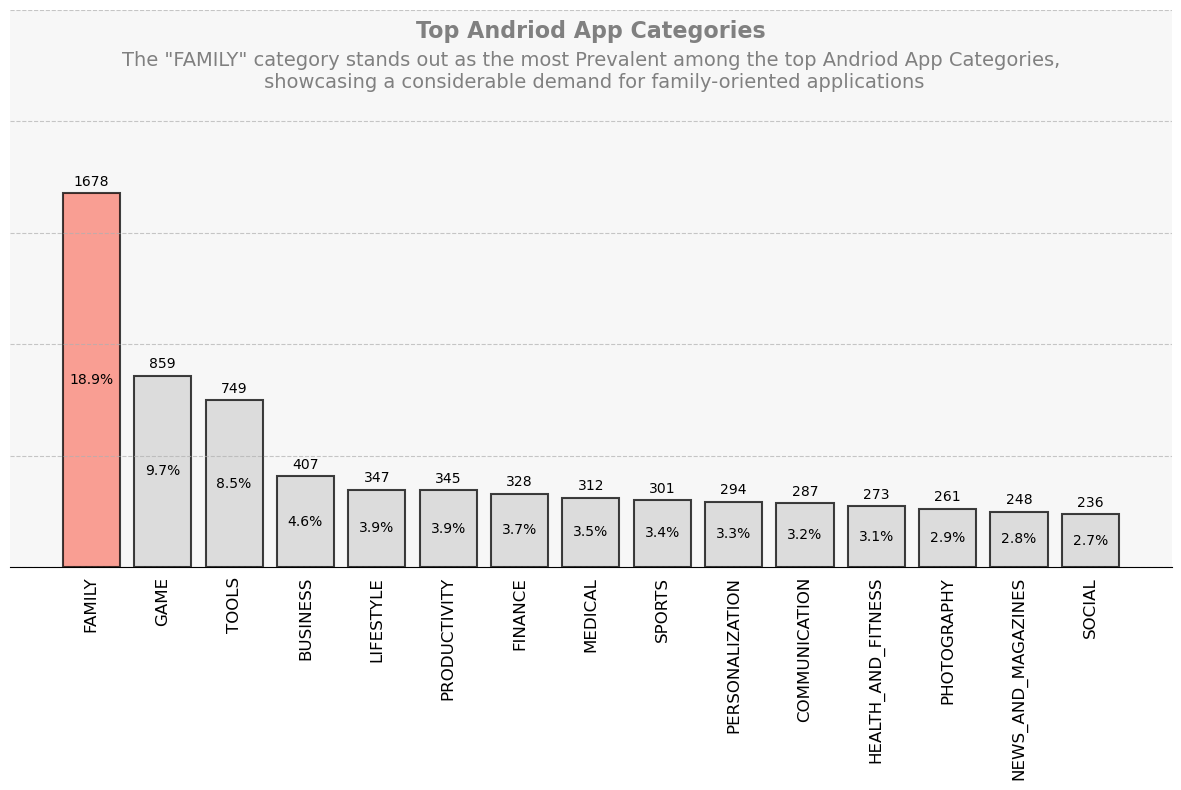

In [43]:
# Data
categories = andriod_final["Category"].value_counts().index[:15]
counts = andriod_final["Category"].value_counts().values[:15]
percentage = round(andriod_final["Category"].value_counts(normalize = True)*100,1)[:15]

# Create stylish bar Chart
plt.figure(figsize=(12,8))
bars = plt.bar(categories, counts, color='lightgray', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) # customized tick labels
plt.yticks(range(0, 3000, 500), [], fontsize=12) #customized tick labels and customized y-tick range
plt.tick_params(bottom = 0, left = 0)

# find the category with the highest count
max_count_category = categories[counts.argmax()]

# highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
# Adding a Background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding Chart Title inside the Chart
plt.text(0.5,0.95, 'Top Andriod App Categories', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes, 
         color='gray', fontweight='bold')

# Adding Conclusion inside the Chart
plt.text(0.5, 0.86, 'The "FAMILY" category stands out as the most Prevalent among the top Andriod App Categories,\n showcasing a considerable demand for family-oriented applications', 
         horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes, color='gray')

# Remove Spines
for i in ['top', 'right','left']:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout()   # Adjust layout to prevent clipping

plt.show()
    

In [44]:
andriod_final[andriod_final['Category'] == "FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


# Most Popular Apps by Genre on Google Play Store

For the Google Play Market, we actually have data about the Number of installs, so we should be able to get a clearer picture about Genre Popularity. However, the Install numbers don't seem precise enough, we can see that most values are open ended(100+, 1000+, 5000+ etc):

In [45]:
andriod_final["Installs"].value_counts(normalize = True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [46]:
andriod_final["Installs_int"] = andriod_final["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\Suhaib Ahmed Abbasi\AppData\Local\Temp\ipykernel_16260\3517007133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andriod_final["Installs_int"] = andriod_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [47]:
install_frq = andriod_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [48]:
install_frq_per = round(andriod_final["Installs_int"].value_counts(normalize=True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

Installs_int
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

In [49]:
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [50]:
# Alphanumeric Units
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return  f'{value / 1e3:.0f}K'
    else:
        return  f'{value:.0f}'

In [51]:
alphanumeric_units(1000)

'1K'

In [52]:
f'{2000 / 1e3:.0f}K'

'2K'

In [53]:
country = "Pakistan"

f"my country name is {country}"

'my country name is Pakistan'

In [56]:
install_frq.index

Index([      1000,       5000,      10000,      50000,     100000,     500000,
          1000000,    5000000,   10000000,   50000000,  100000000,  500000000,
       1000000000],
      dtype='int32', name='Installs_int')

In [57]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq.index

Index(['1K', '5K', '10K', '50K', '100K', '500K', '1M', '5M', '10M', '50M',
       '100M', '500M', '1B'],
      dtype='object', name='Installs_int')

In [58]:
install_frq

Installs_int
1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: count, dtype: int64

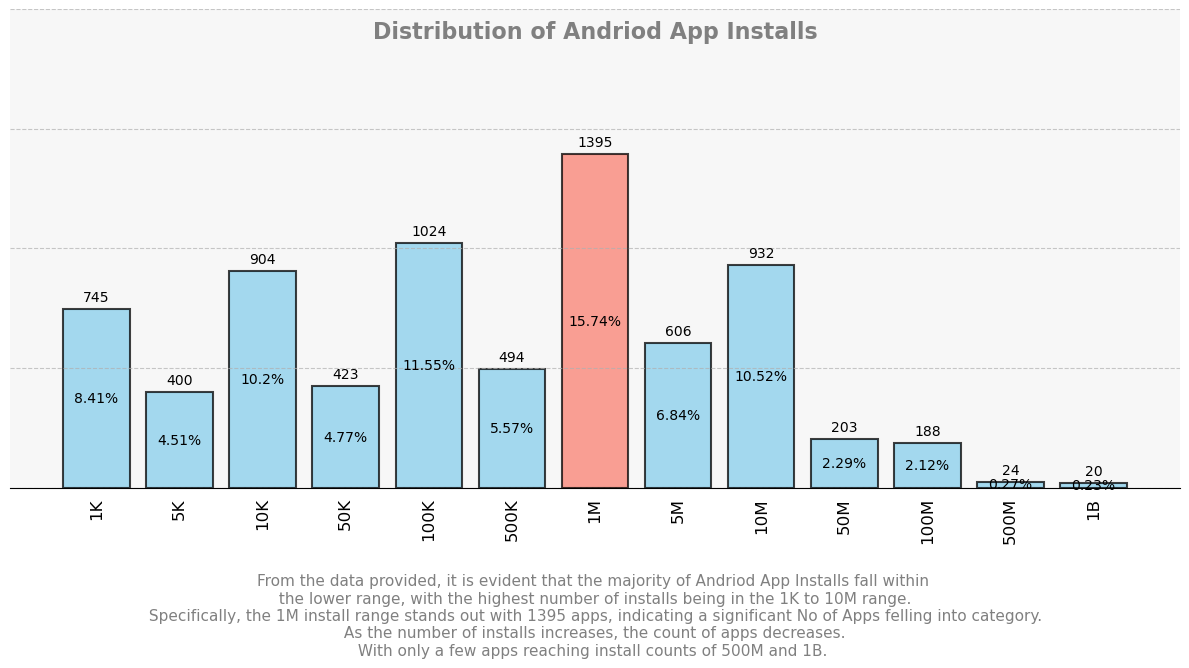

In [61]:
# Data
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values

# Create stylish bar Chart
plt.figure(figsize=(12,7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) # customized tick labels
plt.yticks(range(0, 2500, 500), [], fontsize=12) #customized tick labels and customized y-tick range
plt.tick_params(bottom = 0, left = 0)

# find the category with the highest count
max_count_category = categories[counts.argmax()]

# highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
# Adding a Background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding Chart Title inside the Chart
plt.text(0.5,0.94, 'Distribution of Andriod App Installs', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes, 
         color='gray', fontweight='bold')

# Adding Conclusion inside the Chart
plt.text(0.5, -0.35, 'From the data provided, it is evident that the majority of Andriod App Installs fall within \n the lower range, with the highest number of installs being in the 1K to 10M range. \n Specifically, the 1M install range stands out with 1395 apps, indicating a significant No of Apps felling into category. \n As the number of installs increases, the count of apps decreases. \n With only a few apps reaching install counts of 500M and 1B.  ', 
         horizontalalignment='center', fontsize=11, transform=plt.gca().transAxes, color='gray')

# Remove Spines
for i in ['top', 'right','left']:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout()   # Adjust layout to prevent clipping

plt.show()
    

In [62]:
categories_andriod = andriod_final["Category"].unique()
categories_andriod

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [68]:
# Display Dataframe without scientific Notation
pd.options.display.float_format = '{:.0f}'.format

In [70]:
categories_installs = pd.pivot_table(andriod_final, values='Installs_int', index='Category', aggfunc='mean')
categories_installs = categories_installs.sort_values(by="Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [71]:
categories_installs = pd.pivot_table(andriod_final, values='Installs_int', index='Category', aggfunc='mean')
categories_installs = categories_installs.sort_values(by="Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [74]:
# Alphanumeric Units
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return  f'{value / 1e3:.1f}K'
    else:
        return  f'{value:.1f}'

In [75]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

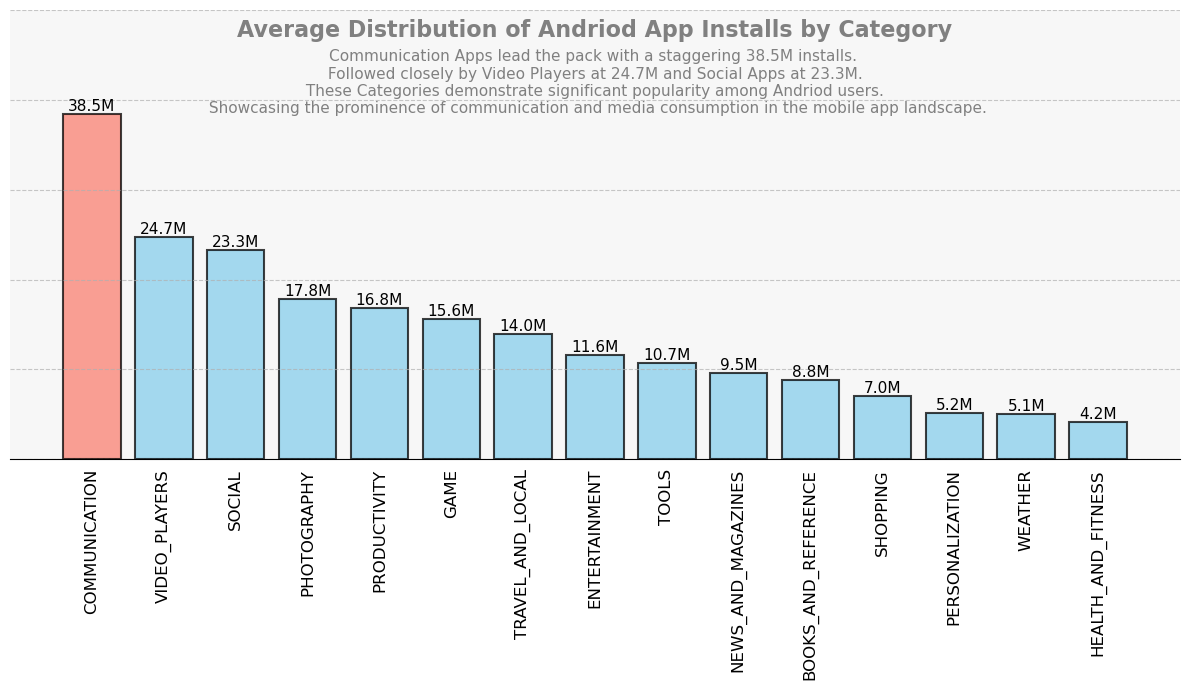

In [81]:
# Data
categories = categories_installs.index[:15]
counts =categories_installs.values[:15]

# Create stylish bar Chart
plt.figure(figsize=(12,7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) # customized tick labels
plt.yticks(range(0, 60000000, 10000000), [], fontsize=12) #customized tick labels and customized y-tick range
plt.tick_params(bottom = 0, left = 0)

# find the category with the highest count
max_count_category = categories[counts.argmax()]

# highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, units in zip(bars, categories_installs_unit.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 25, units, ha='center', va='bottom', fontsize=11)
# Adding a Background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding Chart Title inside the Chart
plt.text(0.5,0.94, 'Average Distribution of Andriod App Installs by Category', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes, 
         color='gray', fontweight='bold')

# Adding Conclusion inside the Chart
plt.text(0.5, 0.77, 'Communication Apps lead the pack with a staggering 38.5M installs. \n Followed closely by Video Players at 24.7M and Social Apps at 23.3M. \n These Categories demonstrate significant popularity among Andriod users. \n Showcasing the prominence of communication and media consumption in the mobile app landscape.', 
         horizontalalignment='center', fontsize=11, transform=plt.gca().transAxes, color='gray')

# Remove Spines
for i in ['top', 'right','left']:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout()   # Adjust layout to prevent clipping

plt.show()
    

In [82]:
category_group = andriod_final.groupby("Category")

In [83]:
COMMUNICATION = category_group.get_group("COMMUNICATION").sort_values(by="Installs_int", ascending = False)
COMMUNICATION.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [84]:
# Alphanumeric Units
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return  f'{value / 1e3:.0f}K'
    else:
        return  f'{value:.0f}'

In [85]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [87]:
df = COMMUNICATION[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [90]:
df = category_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [91]:
df = category_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [92]:
df = category_group.get_group("PHOTOGRAPHY").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


# Analysis of Photography Category and Potential for Photo Generation in 2024

## Conclusion

The Analysis of the Photography category reveals a notable trend in the popularity of photo editing and college-making application, with several apps gamering over 100 Million installs. This indicates a strong demand for photo-related functionalities among users.

Given this observation, this appears to be significant potential for the development of a photo generation application in 2024. Such an App, offering prompt and free generation of pictures and photos, could capitalize on the existing user interest in photography apps. By providing innovative features, easy usability and high-quality output, this application could stand out in the competitive market and attract a large user base.

Considering the success of existing photography apps and the evolving preferences of users, investing in the development of a photo generation app seems promising for tapping into this lucrative market segment in 2024 